<a href="https://colab.research.google.com/github/LisCR/Machine-Learning/blob/master/C%C3%B3digo_do_Gr%C3%A1fico_de_Dispers%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

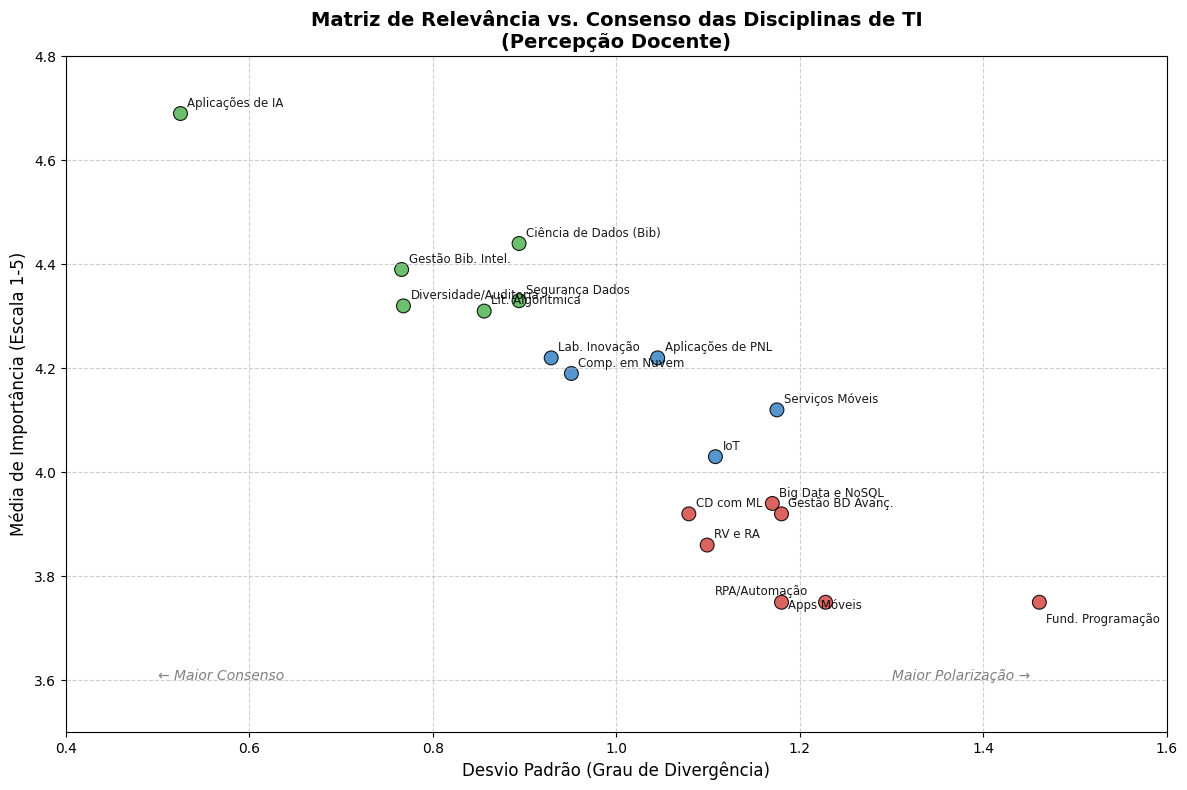

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Definição dos Dados (Baseado na tabela fornecida)
# Criamos um dicionário com três listas: Nomes, Médias e Desvios Padrão
data = {
    'Disciplina': [
        'Aplicações de IA', 'Ciência de Dados (Bib)', 'Gestão Bib. Intel.', 'Segurança Dados',
        'Diversidade/Auditoria', 'Lit. Algorítmica', 'Aplicações de PNL', 'Lab. Inovação',
        'Comp. em Nuvem', 'Serviços Móveis', 'IoT', 'Big Data e NoSQL',
        'CD com ML', 'Gestão BD Avanç.', 'RV e RA',
        'Fund. Programação', 'RPA/Automação', 'Apps Móveis'
    ],
    'Média': [
        4.69, 4.44, 4.39, 4.33,
        4.32, 4.31, 4.22, 4.22,
        4.19, 4.12, 4.03, 3.94,
        3.92, 3.92, 3.86,
        3.75, 3.75, 3.75
    ],
    'Desvio_Padrão': [
        0.525, 0.894, 0.766, 0.894,
        0.768, 0.856, 1.045, 0.929,
        0.951, 1.175, 1.108, 1.170,
        1.079, 1.180, 1.099,
        1.461, 1.228, 1.180
    ]
}

# 2. Criação do DataFrame (Tabela estruturada)
df = pd.DataFrame(data)

# 3. Configuração da Figura (Área do gráfico)
plt.figure(figsize=(12, 8)) # Largura: 12 polegadas, Altura: 8 polegadas

# 4. Lógica de Cores (Categorização)
# Definimos cores baseadas nos grupos de médias identificados na análise textual
colors = []
for x in df['Média']:
    if x > 4.30:
        colors.append('#5cb85c')  # Verde (Núcleo Estratégico/Alto Consenso)
    elif x > 4.00:
        colors.append('#428bca')  # Azul (Relevância Complementar)
    else:
        colors.append('#d9534f')  # Vermelho (Polarizado/Menor Prioridade)

# 5. Plotagem dos Pontos (Scatter Plot)
# Eixo X = Desvio Padrão, Eixo Y = Média
plt.scatter(
    df['Desvio_Padrão'],
    df['Média'],
    c=colors,       # Lista de cores definida acima
    s=100,          # Tamanho da bolinha (size)
    alpha=0.9,      # Transparência (0 a 1)
    edgecolors='black', # Cor da borda da bolinha
    linewidths=0.8  # Espessura da borda
)

# 6. Anotações (Rótulos dos pontos)
# Loop para colocar o nome de cada disciplina ao lado do seu ponto
for i, txt in enumerate(df['Disciplina']):
    # Posição padrão do texto (5 pixels para direita, 5 para cima)
    xy_text = (5, 5)

    # Ajustes Manuais para evitar sobreposição de textos (ajuste fino)
    if txt == 'Fund. Programação':
        xy_text = (5, -15) # Move o texto para baixo
    elif txt == 'RPA/Automação':
        xy_text = (-80, 5) # Move o texto para a esquerda
    elif txt == 'Apps Móveis':
        xy_text = (5, -5)
    elif txt == 'CD com ML':
        xy_text = (5, 5)

    # Comando que escreve o texto no gráfico
    plt.annotate(
        txt,
        (df['Desvio_Padrão'][i], df['Média'][i]), # Coordenada do ponto
        xytext=xy_text,                           # Deslocamento do texto
        textcoords='offset points',               # Sistema de coordenadas
        fontsize=8.5,                             # Tamanho da fonte
        alpha=0.9
    )

# 7. Títulos e Rótulos dos Eixos
plt.title('Matriz de Relevância vs. Consenso das Disciplinas de TI\n(Percepção Docente)', fontsize=14, fontweight='bold')
plt.xlabel('Desvio Padrão (Grau de Divergência)', fontsize=12)
plt.ylabel('Média de Importância (Escala 1-5)', fontsize=12)

# 8. Setas e Textos Explicativos (Contexto Didático)
# Texto indicando "Maior Consenso" à esquerda
plt.text(0.5, 3.6, '← Maior Consenso', fontsize=10, color='gray', style='italic')
# Texto indicando "Maior Polarização" à direita
plt.text(1.3, 3.6, 'Maior Polarização →', fontsize=10, color='gray', style='italic')

# 9. Configurações Finais (Grid e Limites)
plt.grid(True, linestyle='--', alpha=0.6) # Linhas de grade tracejadas
plt.xlim(0.4, 1.6) # Limites do eixo X (Visualização focada nos dados)
plt.ylim(3.5, 4.8) # Limites do eixo Y

# 10. Salvar e Mostrar
plt.tight_layout() # Ajusta as margens automaticamente
plt.savefig('grafico_dispersao_analise.png', dpi=300) # Salva com alta resolução
plt.show() # Exibe na tela